In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import cas as cas
import importlib
import pickle

## Coherent Oscillations

In [3]:
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.0
qubit = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d, 5, 10, 10)

### Gaussian progression

In [5]:
from scipy.special import erf

pts=100
s_g = np.linspace(0, 1, pts)

Omega=0.25*2*np.pi; # This is in units of GHz
alpha = 30; mu = 1/3
theta = np.pi/8*(2 + erf(alpha*(s_g+mu-1/2))
                 + erf(alpha*(s_g-mu-1/2)))

x_cutsom_g = Omega*np.cos(theta)
z_custom_g = Omega*np.sin(theta)

print("t_coh = ", np.pi/(2*Omega*mu), "ns")
print("t_ad = ", alpha/(Omega), "ns")

t_coh =  3.0 ns
t_ad =  19.098593171027442 ns


In [6]:
%%time

phix_custom_g, phiz_custom_g = qubit.get_fluxes(x_cutsom_g, z_custom_g, optimizer_method="leastsq", verbose=True)

point #89 single qubit residuals: 
 [-3.98938987e-02  1.14708408e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #89, solver found solutions that are not optimal. The relative error is 2.54 % for single qubit residuals
  ).format(i, rel_error * 100)


point #90 single qubit residuals: 
 [-7.94940539e-02  1.38229231e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #90, solver found solutions that are not optimal. The relative error is 5.06 % for single qubit residuals
  ).format(i, rel_error * 100)


point #91 single qubit residuals: 
 [-8.96906661e-02  1.68198942e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #91, solver found solutions that are not optimal. The relative error is 5.71 % for single qubit residuals
  ).format(i, rel_error * 100)


point #92 single qubit residuals: 
 [-9.18805128e-02  1.49303955e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #92, solver found solutions that are not optimal. The relative error is 5.85 % for single qubit residuals
  ).format(i, rel_error * 100)


point #93 single qubit residuals: 
 [-9.22728650e-02  1.62412963e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #93, solver found solutions that are not optimal. The relative error is 5.87 % for single qubit residuals
  ).format(i, rel_error * 100)


point #94 single qubit residuals: 
 [-9.23315092e-02  7.45426176e-06] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #94, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


point #95 single qubit residuals: 
 [-9.23388201e-02  9.86819629e-06] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #95, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


point #96 single qubit residuals: 
 [-9.23395836e-02 -8.36590316e-06] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #96, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


point #97 single qubit residuals: 
 [-9.23396395e-02  4.86664620e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #97, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


point #98 single qubit residuals: 
 [-9.23396501e-02  1.56267230e-05] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #98, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


point #99 single qubit residuals: 
 [-9.23396508e-02  1.28576382e-05] 

CPU times: user 25min 13s, sys: 26min 17s, total: 51min 30s
Wall time: 4min 22s


/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #99, solver found solutions that are not optimal. The relative error is 5.88 % for single qubit residuals
  ).format(i, rel_error * 100)


In [24]:
# with open('./data/circuit_DQA.pkl', 'wb') as file:
#     pickle.dump(circuit, file)

In [8]:
%%time

x_g, z_g = np.zeros((2, len(s_g)))
for i, (phix, phiz) in enumerate(zip(phix_custom_g, phiz_custom_g)):
    x_g[i], z_g[i] = qubit.get_ising(phix, phiz)[0]

CPU times: user 1min 31s, sys: 1min 36s, total: 3min 7s
Wall time: 16 s


### Polynomial

In [9]:
pts=100
s_p = np.linspace(0, 1, pts)

h=0.167*2*np.pi; # This is in units of GHz
p=8

x_cutsom_p = h*(1-(2*s_p-1)**p)
z_custom_p = h*(1-2*s_p)**p

print("t_coh = ", np.pi/(h), "ns")
print("t_ad = ", p*np.pi/(h), "ns")

t_coh =  2.9940119760479043 ns
t_ad =  23.952095808383234 ns


In [10]:
%%time

phix_custom_p, phiz_custom_p = qubit.get_fluxes(x_cutsom_p, z_custom_p, optimizer_method="leastsq", verbose=True)

point #0 single qubit residuals: 
 [-0.09226361  0.0001026 ] 



/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #0, solver found solutions that are not optimal. The relative error is 8.79 % for single qubit residuals
  ).format(i, rel_error * 100)


point #99 single qubit residuals: 
 [-9.22636210e-02  4.77029387e-06] 

CPU times: user 19min 49s, sys: 20min 30s, total: 40min 20s
Wall time: 3min 25s


/home/mostafa/Dropbox/Research/FluQS/codes/quack/quack/schedule/one_qubit.py:622: UserWarning: For the point #99, solver found solutions that are not optimal. The relative error is 8.79 % for single qubit residuals
  ).format(i, rel_error * 100)


In [11]:
%%time

x_p, z_p = np.zeros((2, len(s_p)))
for i, (phix, phiz) in enumerate(zip(phix_custom_p, phiz_custom_p)):
    x_p[i], z_p[i] = qubit.get_ising(phix, phiz)[0]

CPU times: user 1min 27s, sys: 1min 30s, total: 2min 58s
Wall time: 15.2 s


### import time evolutions

In [18]:
tf_list = np.linspace(0.1, 40, 400)
pops_p = np.loadtxt('./data/pops_poly.csv', delimiter=',')[:, 0]
pops_g = np.loadtxt('./data/pops_gauss.csv', delimiter=',')[:, 0]

### Plot all

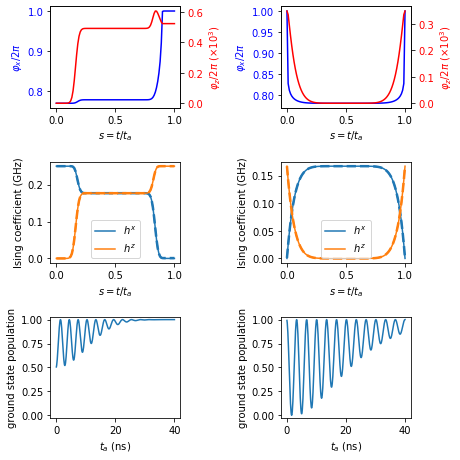

In [40]:
##### PLOTING #####
plt.clf()

fig = plt.figure(num=1);
fig.set_size_inches((6.5, 6.5))

ax11 = plt.subplot(321)
ax11.plot(s_g, phix_custom_g/2/np.pi, 'b')
ax11.tick_params(axis='y', labelcolor='b')
ax11.set_xlabel(r'$s=t/t_a$')
ax11.set_ylabel(r'$\varphi_x/2\pi$', color="b")

ax12 = ax11.twinx()
ax12.plot(s_g, 1000*phiz_custom_g/2/np.pi, 'r')
ax12.tick_params(axis='y', labelcolor='r')
ax12.set_ylabel(r'$\varphi_z/2\pi$ $(\times 10^3)$', color="r")

ax21 = plt.subplot(322)
ax21.plot(s_p, phix_custom_p/2/np.pi, 'b')
ax21.tick_params(axis='y', labelcolor='b')
ax21.set_xlabel(r'$s=t/t_a$')
ax21.set_ylabel(r'$\varphi_x/2\pi$', color="b")

ax22 = ax21.twinx()
ax22.plot(s_p, 1000*phiz_custom_p/2/np.pi, 'r')
ax22.tick_params(axis='y', labelcolor='r')
ax22.set_ylabel(r'$\varphi_z/2\pi$ $(\times 10^3)$', color="r")

ax3 = plt.subplot(323)
plt.plot(s_g, x_cutsom_g/(2*np.pi), label=r"$h^x$", c="C0")
plt.plot(s_g, x_g/(2*np.pi), "--", c="C0", lw=2.5)
plt.plot(s_g, z_custom_g/(2*np.pi), label=r"$h^z$", c="C1")
plt.plot(s_g, z_g/(2*np.pi), "--", c="C1", lw=2.5)

plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficient (GHz)")
plt.legend()

ax4 = plt.subplot(324)

plt.plot(s_p, x_cutsom_p/(2*np.pi), label=r"$h^x$", c="C0")
plt.plot(s_p, x_p/(2*np.pi), "--", c="C0", lw=2.5)
plt.plot(s_p, z_custom_p/(2*np.pi), label=r"$h^z$", c="C1")
plt.plot(s_p, z_p/(2*np.pi), "--", c="C1", lw=2.5)

plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficient (GHz)")
plt.legend()

ax5 = plt.subplot(325)

plt.plot(tf_list, pops_g, c="C0")
plt.xlabel(r"$t_a$ (ns)"); plt.ylabel(r"ground state population")
plt.ylim(-0.03, 1.03)

ax6 = plt.subplot(326)

plt.plot(tf_list, pops_p, c="C0")
plt.xlabel(r"$t_a$ (ns)"); plt.ylabel(r"ground state population")
plt.ylim(-0.03, 1.03)

plt.tight_layout()
# plt.savefig("./plots/CO_schedules_fluxes.pdf", bbox_inches="tight")
plt.show()